<a href="https://colab.research.google.com/github/preetcoder07/PDF_MASTER/blob/main/Gene_Expression_Data_Clustering_(Bioinformatics).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [78]:
data = pd.read_csv('genes..csv')
data.shape

(14673, 17)

In [79]:
x = data.iloc[: ,5:].values

In [80]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_data =  sc.fit_transform(x)

In [81]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(sc_data)

In [82]:
from sklearn.cluster import KMeans
inertia = []
for i in range(1,10):
  kmeans = KMeans(n_clusters=i , random_state = 40)
  kmeans.fit(sc_data)
  inertia.append(kmeans.inertia_)

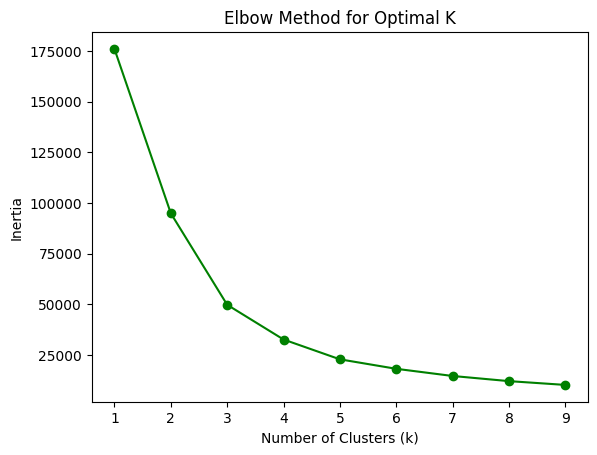

In [83]:
plt.plot(range(1,10), inertia, marker='o' ,color='green')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [84]:
kmeans = KMeans(n_clusters= 5 , random_state = 40)
y_kmeans = kmeans.fit_predict(sc_data)
print(y_kmeans)

[0 0 0 ... 0 2 0]


In [85]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(sc_data, y_kmeans)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.7330103213964162


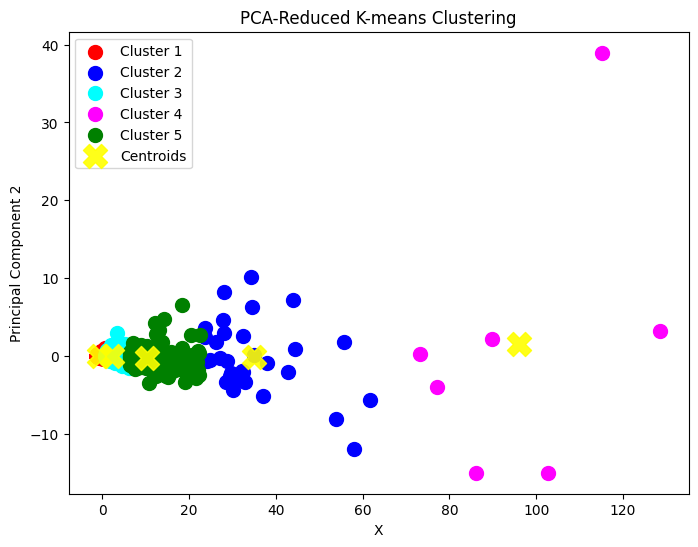

In [86]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[y_kmeans == 0, 0], pca_data[y_kmeans == 0, 1], color='red', s=100, label='Cluster 1'  )
plt.scatter(pca_data[y_kmeans == 1, 0], pca_data[y_kmeans == 1, 1], color='blue', s=100, label='Cluster 2')
plt.scatter(pca_data[y_kmeans == 2, 0], pca_data[y_kmeans == 2, 1], color='cyan', s=100, label='Cluster 3')
plt.scatter(pca_data[y_kmeans == 3, 0], pca_data[y_kmeans == 3, 1], color='magenta', s=100, label='Cluster 4')
plt.scatter(pca_data[y_kmeans == 4, 0], pca_data[y_kmeans == 4, 1], color='green', s=100, label='Cluster 5')
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], color='yellow', s=300, label='Centroids', marker='X' ,alpha = 0.9)

plt.title('PCA-Reduced K-means Clustering')
plt.xlabel('X')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()